# Dispa-SET Post-processing

This Notebook illustrates how Dispa-SET simulation results can be loaded, analysed and plotted. It uses the functions provided within the PostProcessing.py file.

Sylvain Quoilin, Joint Research Centre

November 2016

### Load DispaSET and the required libraries:

In [1]:
%matplotlib inline
from __future__ import division
import sys
sys.path.append("..")  

import DispaSET as ds
import pandas as pd
import numpy as np

### Define the path to the simulation environment

The folder must contain the simulatin inputs (written by the pre-processing tool) as wall as the simulation results (Results.gdx).

In [2]:
path = '../Simulations/simulationWB'

### Load the inputs and the results of the simulation

This can be computationally intensive for large simulations:

In [3]:
inputs,results = ds.get_sim_results(path=path,cache=True)

[WARNING ] (get_sim_results): The provided path for GAMS ( ) does not exist. Trying to locate...
[INFO    ] (get_gams_path): Detected C:\GAMS\win64\24.3 as GAMS path on this computer
[INFO    ] (gdx_to_list): Loading gdx file ..\Simulations\simulationWB\Results.gdx took 26.6499998569s
[INFO    ] (gdx_to_dataframe): Time to convert to dataframes: 67.5160000324s


### Format the inputs as a dictionary of dataframes:

In [4]:
datain = ds.ds_to_df(inputs)

### Select the time period for plotting

In [57]:
rng = pd.DatetimeIndex(start='2010-07-01 00:00:00',end='2010-07-31 23:00:00',freq='h')

### Plotting the detailed analysis for one of the zones, randomly

In [78]:
Nzones = len(inputs['sets']['n'])
c = inputs['sets']['n'][np.random.randint(Nzones)]
print('Randomly selected zone for the detailed analysis: '+ c)

Randomly selected zone for the detailed analysis: BA


### Generate plots

for the selected zone:
- dispatch plot (generation per fuel type) 
- rug  plog (ON/OFF status of each power plant 

True

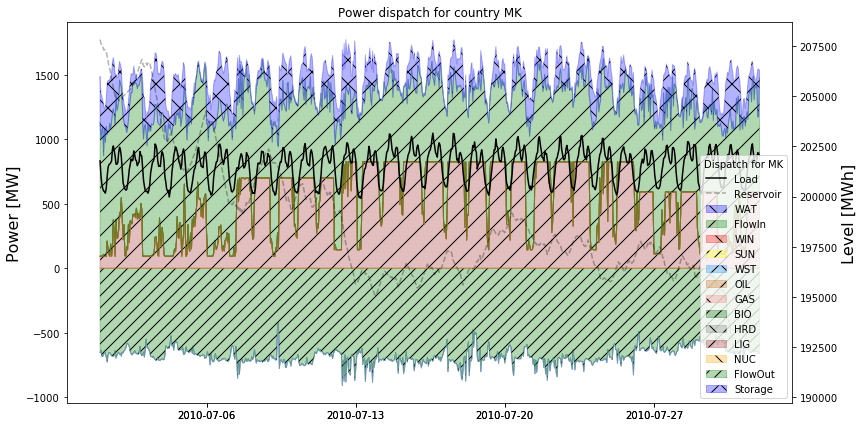

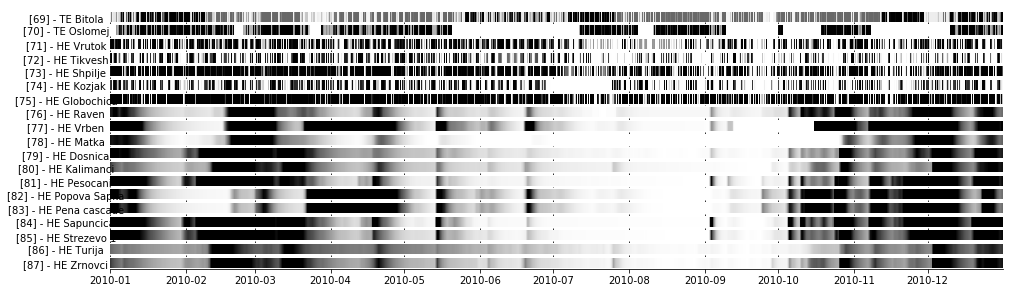

In [76]:
ds.plot_country(inputs,results,c,rng=rng)

### Analyse the results for each country and provide quantitative indicators:

In [26]:
r = ds.get_result_analysis(inputs,results)


Average electricity cost : 17.343354913 EUR/MWh

Aggregated statistics for the considered area:
Total consumption:70.9436097877 TWh
Peak load:13576.644 MW
Net importations:-2.79583084605 TWh

Country-Specific values (in TWh or in MW):
       Demand  PeakLoad  NetImports  LoadShedding  Curtailment
AL   6.772882  1600.644   -0.364675           NaN          NaN
BA  12.074522  2173.000   -3.602761  1.569991e-04          NaN
ME   3.925841   813.000   -0.734232  1.156135e-07          NaN
MK   8.015778  1626.000    1.609512  3.922644e-04          NaN
RS  34.443275  6601.190   -2.181265  8.562154e-05          NaN
XK   5.711312  1154.940    2.477590  2.554436e-04          NaN

Number of hours of congestion on each line: 
{'AL -> ME': 2223,
 'AL -> XK': 3940,
 'BA -> ME': 2792,
 'BA -> RS': 710,
 'ME -> AL': 2698,
 'ME -> BA': 1470,
 'ME -> RS': 1611,
 'ME -> XK': 4627,
 'MK -> XK': 324,
 'RS -> BA': 1656,
 'RS -> ME': 5285,
 'RS -> XK': 2784,
 'XK -> AL': 1692,
 'XK -> ME': 249,
 'XK -> MK': 3

### Plot the levels of all storage units:

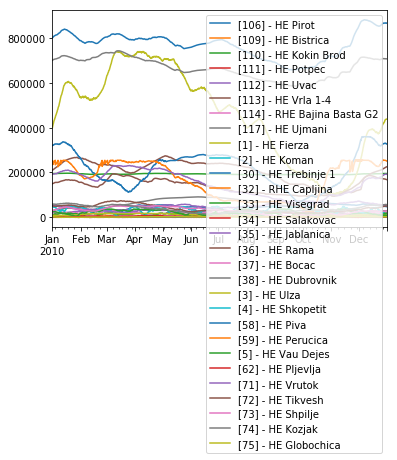

In [10]:
if 'OutputStorageLevel' in results:
    results['OutputStorageLevel'].plot()

### Bar plot of the overall generation in each zone by fuel type:

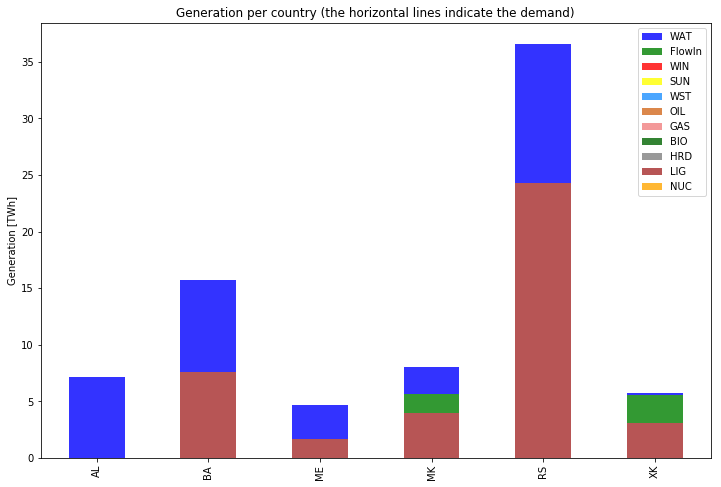

In [11]:
PPindicators = ds.get_indicators_powerplant(inputs,results)
ax = ds.plot_energy_country_fuel(datain,results,PPindicators)

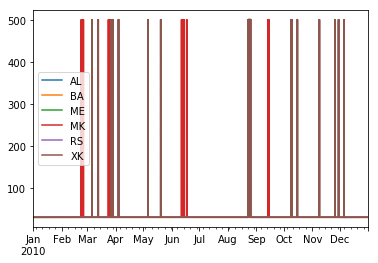

In [12]:
results['ShadowPrice'].plot()

In [13]:
inputs['units'].groupby(['Fuel']).sum()['PowerCapacity']

Fuel
GAS     353.0000
LIG    7419.0000
OIL      98.0000
WAT    7679.6155
Name: PowerCapacity, dtype: float64

In [14]:
inputs['units']

,Unnamed: 0,PowerCapacity,Unit,Zone,Technology,Fuel,Efficiency,TimeUpMinimum,TimeDownMinimum,RampUpRate,...,MinEfficiency,StartUpTime,EmissionRate,CHPType,CHPPowerToHeat,StorageCapacity,StorageSelfDischarge,StorageChargingCapacity,StorageChargingEfficiency,CHPPowerLossFactor
[0] - TE Vlora,0.0,98.000,[0] - TE Vlora,AL,COMC,OIL,0.600000,2.0,2,0.060,...,0.49,3.0,398.000,,NaN,NaN,NaN,NaN,NaN,NaN
[1] - HE Fierza,1.0,600.000,[1] - HE Fierza,AL,HDAM,WAT,0.925909,0.0,0,1.000,...,0.50,1.0,0.000,,NaN,739565.00,NaN,NaN,NaN,NaN
[2] - HE Koman,2.0,500.000,[2] - HE Koman,AL,HDAM,WAT,0.865632,0.0,0,1.000,...,0.50,1.0,0.000,,NaN,49180.80,NaN,NaN,NaN,NaN
[3] - HE Ulza,3.0,25.000,[3] - HE Ulza,AL,HDAM,WAT,0.737382,0.0,0,1.000,...,0.50,1.0,0.000,,NaN,18246.60,NaN,NaN,NaN,NaN
[4] - HE Shkopetit,4.0,24.000,[4] - HE Shkopetit,AL,HDAM,WAT,0.794312,0.0,0,1.000,...,0.50,1.0,0.000,,NaN,1573.69,NaN,NaN,NaN,NaN
[5] - HE Vau Dejes,5.0,250.000,[5] - HE Vau Dejes,AL,HDAM,WAT,0.867400,0.0,0,1.000,...,0.50,1.0,0.000,,NaN,37267.10,NaN,NaN,NaN,NaN
[6] - HE Bistrica 1,6.0,22.500,[6] - HE Bistrica 1,AL,HROR,WAT,0.850000,0.0,0,1.000,...,0.50,1.0,0.000,,NaN,NaN,NaN,NaN,NaN,NaN
[7] - HE Bistrica 2,7.0,5.000,[7] - HE Bistrica 2,AL,HROR,WAT,0.850000,0.0,0,1.000,...,0.50,1.0,0.000,,NaN,NaN,NaN,NaN,NaN,NaN
[8] - HE Borsh,8.0,0.250,[8] - HE Borsh,AL,HROR,WAT,0.850000,0.0,0,1.000,...,0.50,1.0,0.000,,NaN,NaN,NaN,NaN,NaN,NaN
[9] - HE Kerpice,9.0,0.420,[9] - HE Kerpice,AL,HROR,WAT,0.850000,0.0,0,1.000,...,0.50,1.0,0.000,,NaN,NaN,NaN,NaN,NaN,NaN
